In [1]:
from typing import Dict, TypedDict

In [2]:
from langgraph.graph import StateGraph

In [3]:
class AgentState(TypedDict):
    message: str

In [4]:
def greeting_node(state:AgentState) -> AgentState:
    """
    Simple node that adds a greeting message to the state
    """
    state['message'] = "Hey " + state['message'] +", how are you doing?"
    return state

In [5]:
graph = StateGraph(AgentState)

In [6]:
graph.add_node("greeter", greeting_node)

In [7]:
graph.set_entry_point("greeter")
graph.set_finish_point("greeter")

In [8]:
app = graph.compile()

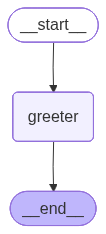

In [9]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [10]:
result = app.invoke({"message":"Bob"})

In [11]:
result

{'message': 'Hey Bob, how are you doing?'}

In [12]:
result['message']

'Hey Bob, how are you doing?'

In [13]:
class AgentState2(TypedDict):
    message: str
    name: str

In [14]:
def compliment_node(state:AgentState2) -> AgentState2:
    """
    Simple node that adds a compliment message to the state
    """
    state['message'] = "Hey " + state['name'] +", you're doing an amazing job learning langgraph"
    return state

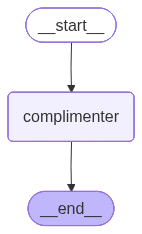

In [15]:
graph = StateGraph(AgentState2)
graph.add_node("complimenter", compliment_node)
graph.set_entry_point("complimenter")
graph.set_finish_point("complimenter")
app = graph.compile()
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [16]:
result = app.invoke({"name":"Bob"})

In [17]:
result

{'message': "Hey Bob, you're doing an amazing job learning langgraph",
 'name': 'Bob'}

In [18]:
from typing import List

In [19]:
class AgentState3(TypedDict):
    values: List[int]
    name: str
    result: str

In [20]:
def process_values(state:AgentState3) -> AgentState3:
    """
    This function handles multiple different inputs
    """
    print(state)
    state['result'] = f"Hi there, {state['name']}! Your sum is {sum(state['values'])}"
    print(state)
    return state

In [21]:
graph = StateGraph(AgentState3)

graph.add_node("processor", process_values)
graph.set_entry_point("processor")
graph.set_finish_point("processor")
app = graph.compile()

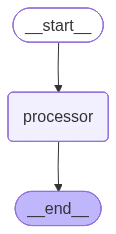

In [22]:
display(Image(app.get_graph().draw_mermaid_png()))

In [23]:
answers = app.invoke({"values":[1,2,3,4], "name":"Steve"})

{'values': [1, 2, 3, 4], 'name': 'Steve'}
{'values': [1, 2, 3, 4], 'name': 'Steve', 'result': 'Hi there, Steve! Your sum is 10'}


In [24]:
answers

{'values': [1, 2, 3, 4],
 'name': 'Steve',
 'result': 'Hi there, Steve! Your sum is 10'}

In [25]:
answers['result']

'Hi there, Steve! Your sum is 10'

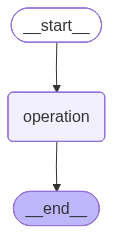

In [26]:
from math import prod
class AgentState4(TypedDict):
    values: List[int]
    operator: str
    result: str
    
def operation(state:AgentState4) -> AgentState4:
    """
    This function multiplies or adds depending on the operator
    """
    if state['operator'] == "+":
        state['result'] = f"{sum(state['values'])}"
    elif state['operator'] == "*":
        state['result'] = f"{prod(state['values'])}"

    return state

graph = StateGraph(AgentState4)

graph.add_node("operation", operation)
graph.set_entry_point("operation")
graph.set_finish_point("operation")
app = graph.compile()
display(Image(app.get_graph().draw_mermaid_png()))

In [27]:
app.invoke({"values":[1,2,3,4], "operator":"*"})

{'values': [1, 2, 3, 4], 'operator': '*', 'result': '24'}

In [28]:
class AgentState(TypedDict):
    name: str
    age: str
    final: str

In [29]:
def first_node(state:AgentState) -> AgentState:
    """
    This is the first node of our sequence
    """
    state['final'] = f'Hi {state['name']}!'
    return state

def second_node(state:AgentState) -> AgentState:
    """
    This is the second node of our sequence
    """
    state['final'] = state['final'] + " " + f'You are {state['age']} years old!'
    return state

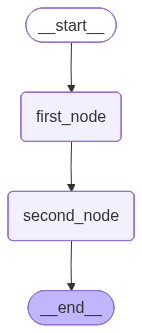

In [30]:
graph = StateGraph(AgentState)

graph.add_node("first_node", first_node)
graph.add_node("second_node", second_node)

graph.set_entry_point("first_node")
graph.add_edge("first_node", "second_node")
graph.set_finish_point("second_node")

app = graph.compile()
display(Image(app.get_graph().draw_mermaid_png()))

In [31]:
app.invoke({"name":"Charlie", "age":20})

{'name': 'Charlie', 'age': 20, 'final': 'Hi Charlie! You are 20 years old!'}

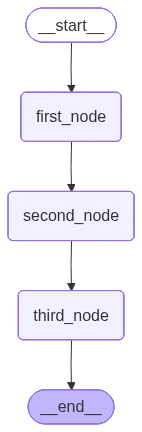

In [32]:
class AgentState(TypedDict):
    name: str
    age: str
    skills: List[str]
    result: str

def first_node(state:AgentState) -> AgentState:
    """
    This is the first node of our sequence
    """
    state['result'] = f'Hi {state['name']}!'
    return state

def second_node(state:AgentState) -> AgentState:
    """
    This is the second node of our sequence
    """
    state['result'] = state['result'] + f' You are {state['age']} years old!'
    return state

def third_node(state:AgentState) -> AgentState:
    """
    This is the third node of our sequence
    """
    state['result'] = state['result'] + f' Your Skills are: {", ".join(state['skills'])}!'
    return state


graph = StateGraph(AgentState)

graph.add_node("first_node", first_node)
graph.add_node("second_node", second_node)
graph.add_node("third_node", third_node)

graph.set_entry_point("first_node")
graph.add_edge("first_node", "second_node")
graph.add_edge("second_node", "third_node")
graph.set_finish_point("third_node")

app = graph.compile()
display(Image(app.get_graph().draw_mermaid_png()))

In [33]:
app.invoke({"name":"Charlie", "age":20, "skills": ["Machine Learning", "LangGraph"]})

{'name': 'Charlie',
 'age': 20,
 'skills': ['Machine Learning', 'LangGraph'],
 'result': 'Hi Charlie! You are 20 years old! Your Skills are: Machine Learning, LangGraph!'}

In [34]:
from langgraph.graph import START, END
from typing import Any

In [35]:
class AgentState(TypedDict):
    number1: int
    operation: str
    number2: int
    finalNumber: int

In [36]:
def adder(state:AgentState) -> AgentState:
    """
    This node adds 2 numbers
    """
    state['finalNumber'] = state['number1'] + state['number2']
    return state

def subtractor(state:AgentState) -> AgentState:
    """
    This node subtracts 2 numbers
    """
    state['finalNumber'] = state['number1'] - state['number2']
    return state

In [37]:
def decide_next_node(state:AgentState) -> Any:
    """This node will select the next node of the graph"""
    
    if state['operation'] == "+":
        return "addition_operation"
    elif state['operation'] == "-":
        return "subtraction_operation"
    


In [38]:
graph = StateGraph(AgentState)

graph.add_node("add_node",adder)
graph.add_node("subtract_node",subtractor)
graph.add_node("router",lambda state: state) #passthrough

graph.add_edge(START, "router")
graph.add_conditional_edges("router"
                            , decide_next_node
                            , {
                                #Edge: Node
                                "addition_operation":"add_node"
                               , "subtraction_operation":"subtract_node"
                               }
                            )

graph.add_edge("add_node", END)
graph.add_edge("subtract_node", END)

In [39]:
app = graph.compile()

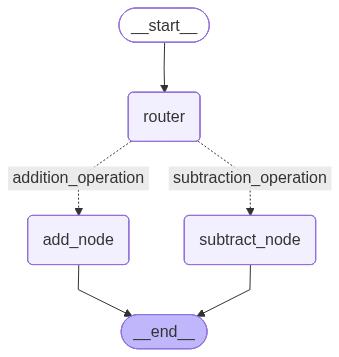

In [40]:
display(Image(app.get_graph().draw_mermaid_png()))

In [41]:
initial_state_1 = AgentState(number1=10, operation='-', number2=5)
app.invoke(initial_state_1)

{'number1': 10, 'operation': '-', 'number2': 5, 'finalNumber': 5}

In [42]:
class AgentState(TypedDict):
    number1: int
    operation: str
    number2: int
    operation2: str
    finalNumber: int

def adder(state:AgentState) -> AgentState:
    """
    This node adds 2 numbers
    """
    state['finalNumber'] = state['finalNumber'] + state['number1'] + state['number2']
    return state

def subtractor(state:AgentState) -> AgentState:
    """
    This node subtracts 2 numbers
    """
    state['finalNumber'] = state['finalNumber'] + state['number1'] - state['number2']
    return state

In [43]:
def decide_next_node(state:AgentState) -> Any:
    """This node will select the next node of the graph"""
    
    if state['operation'] == "+":
        return "addition_operation"
    elif state['operation'] == "-":
        return "subtraction_operation"
    
def decide_next_node2(state:AgentState) -> Any:
    """This node will select the next node of the graph"""
    
    if state['operation2'] == "+":
        return "addition_operation"
    elif state['operation2'] == "-":
        return "subtraction_operation"
    

In [ ]:
graph = StateGraph(AgentState)

graph.add_node("add_node",adder)
graph.add_node("subtract_node",subtractor)
graph.add_node("add_node2",adder)
graph.add_node("subtract_node2",subtractor)
graph.add_node("router1",lambda state: state) #passthrough
graph.add_node("router2",lambda state: state) #passthrough

graph.add_edge(START, "router1")
graph.add_conditional_edges("router1"
                            , decide_next_node
                            , {
                                #Edge: Node
                                "addition_operation":"add_node"
                               , "subtraction_operation":"subtract_node"
                               }
                            )

graph.add_edge("add_node", "router2")
graph.add_edge("subtract_node", "router2")

graph.add_conditional_edges("router2"
                            , decide_next_node2
                            , {
                                #Edge: Node
                                "addition_operation":"add_node2"
                               , "subtraction_operation":"subtract_node2"
                               }
                            )

graph.add_edge("add_node2", END)
graph.add_edge("subtract_node2", END)

app = graph.compile()

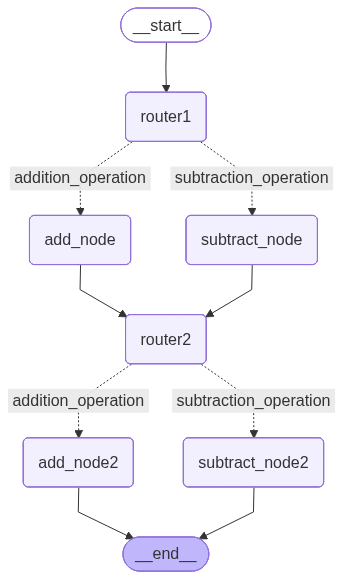

In [45]:
display(Image(app.get_graph().draw_mermaid_png()))

In [46]:
st = AgentState(number1=10, operation="+", number2=2, operation2="-", finalNumber=0)
app.invoke(st)

{'number1': 10,
 'operation': '+',
 'number2': 2,
 'operation2': '-',
 'finalNumber': 20}

In [75]:
class AgentState(TypedDict):
    number1: int
    operation: str
    number2: int
    finalNumber: int
    loop : int

def setup(state:AgentState) -> AgentState:
    """
    This node set things up
    """
    state['finalNumber'] = 0
    state['loop'] = 0
    return state

def adder(state:AgentState) -> AgentState:
    """
    This node adds 2 numbers
    """
    state['finalNumber'] = state['finalNumber'] + state['number1'] + state['number2']
    return state

def subtractor(state:AgentState) -> AgentState:
    """
    This node subtracts 2 numbers
    """
    state['finalNumber'] = state['finalNumber'] + state['number1'] - state['number2']
    return state


def decide_next_node(state:AgentState) -> Any:
    """This node will select the next node of the graph"""
    
    print("loop")
       
    if state['finalNumber'] > 100 or state['finalNumber'] < -100:
        return "exit"

    
    if state['operation'] == "+":
        return "addition_operation"
    elif state['operation'] == "-":
        return "subtraction_operation"
    
def looper(state:AgentState) -> AgentState:
    """
    This node counts the loop iteration
    """
    state['loop'] = state['loop'] + 1 
    return state

In [76]:
graph = StateGraph(AgentState)

graph.add_node("setup_node",setup)
graph.add_node("add_node",adder)
graph.add_node("subtract_node",subtractor)
graph.add_node("exit_node", lambda state: state)
graph.add_node("router",lambda state: state) #passthrough
graph.add_node("loop_node",looper)


graph.add_edge(START, "setup_node")
graph.add_edge("setup_node", "router")
graph.add_conditional_edges("router"
                            , decide_next_node
                            , {
                                #Edge: Node
                                "addition_operation":"add_node"
                               , "subtraction_operation":"subtract_node"
                               , "exit":"exit_node"
                               }
                            )

graph.add_edge("add_node", "loop_node")
graph.add_edge("subtract_node", "loop_node")
graph.add_edge("loop_node", "router")
graph.add_edge("exit_node", END)

app = graph.compile()

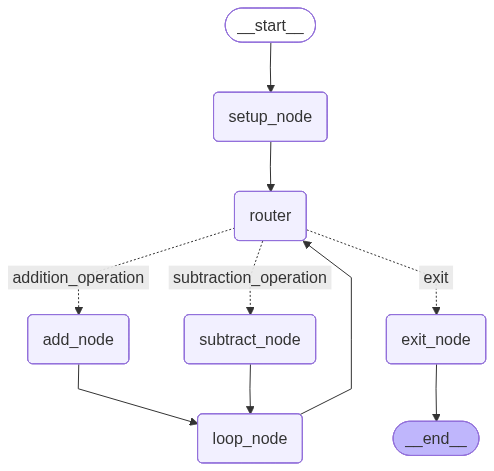

In [77]:
display(Image(app.get_graph().draw_mermaid_png()))

In [81]:
state = AgentState(number1=1, number2=5,operation="+")
app.invoke(state)

loop
loop
loop
loop
loop
loop
loop
loop
loop
loop
loop
loop
loop
loop
loop
loop
loop
loop


{'number1': 1, 'operation': '+', 'number2': 5, 'finalNumber': 102, 'loop': 17}

In [82]:
import random

In [92]:
class AgentState(TypedDict):
    name: str
    number: List[int]
    counter: int
    

In [93]:
def greeting_node(state: AgentState) -> AgentState:
    """
    GReeting node which says hi to the person
    """
    state['name'] = f'Hello {state["name"]}'
    state['counter'] = 0
    state['number'] = []
    
    return state

In [94]:
def random_node(state: AgentState) -> AgentState:
    """
    Random node which returns a random number from 0 to 10
    """
    state['number'].append(random.randint(0,10))
    state['counter'] += 1
    return state

In [95]:
def should_continue(state: AgentState) -> str:
    """Function to decide what to do next"""
    if state['counter']<5:
        print("Entering Loop", state['counter'])
        return "loop"
    else:
        return "exit"

In [96]:
graph = StateGraph(AgentState)

graph.add_node("greeting_node",greeting_node)
graph.add_node("random_node",random_node)

graph.add_edge(START, "greeting_node")
graph.add_edge("greeting_node", "random_node")


graph.add_conditional_edges(
    "random_node"
    ,should_continue
    ,{
        "loop":"random_node"
        ,"exit": END
    }
)
app = graph.compile()

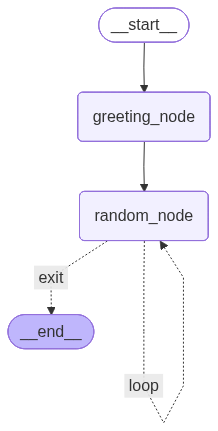

In [97]:
display(Image(app.get_graph().draw_mermaid_png()))

In [98]:
state = AgentState(name="Aioria")
app.invoke(state)

Entering Loop 1
Entering Loop 2
Entering Loop 3
Entering Loop 4


{'name': 'Hello Aioria', 'number': [0, 4, 9, 7, 7], 'counter': 5}